![lop](../../../images/logo_diive1_128px.png)

<span style='font-size:40px; display:block;'>
<b>
    FCH4 vs. USTAR (normalized)
</b>
</span>

---
**Notebook version**: `1` (21 Nov 2023)  
**Author**: Lukas Hörtnagl (holukas@ethz.ch)

# Background
- This notebook investigates the eddy covariance CH4 flux (nmol m-2 s-1) in relation to USTAR (m s-1).
- The used dataset is a special version of the [FLUXNET-CH4 Community Product](https://fluxnet.org/data/fluxnet-ch4-community-product/).
- `FCH4` in this notebook is the flux **before** USTAR filtering.

# Setup

In [1]:
# Variable names in data files
USTAR1 = 'USTAR'
USTAR2 = 'USTAR_1_1_1'  # Alternative name in some files
FLUX1 = 'FCH4'
FLUX2 = 'FCH4_1_1_1'  # Alternative name in some files

# Source folder with data files in parquet format
SOURCEDIR = r"data/CH4/FLUXNET-CH4 Community Product Special Version preUSTAR/PARQUET"

# Imports

In [2]:
import importlib.metadata
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import numpy as np
import pandas as pd

from diive.core.io.filereader import search_files
from diive.core.io.files import load_parquet
from diive.core.plotting.scatter import ScatterXY

version_diive = importlib.metadata.version("diive")
print(f"diive version: v{version_diive}")

Loading BokehJS ...

diive version: v0.67.0


# Search data files
- All data files were first converted to the [Parquet](https://parquet.apache.org/) format for faster processing.

In [8]:
foundfiles = search_files(searchdirs=[SOURCEDIR], pattern='*.parquet')
[print(f"{ix}: {f}") for ix, f in enumerate(foundfiles)];

0: data\CH4\FLUXNET-CH4 Community Product Special Version preUSTAR\PARQUET\AMF_BR-Npw_BASE_HH_1-5.csv.parquet
1: data\CH4\FLUXNET-CH4 Community Product Special Version preUSTAR\PARQUET\AMF_CA-SCB_BASE_HH_1-5.csv.parquet
2: data\CH4\FLUXNET-CH4 Community Product Special Version preUSTAR\PARQUET\AMF_CA-SCC_BASE_HH_1-5.csv.parquet
3: data\CH4\FLUXNET-CH4 Community Product Special Version preUSTAR\PARQUET\AMF_US-A03_BASE_HH_2-5.csv.parquet
4: data\CH4\FLUXNET-CH4 Community Product Special Version preUSTAR\PARQUET\AMF_US-A10_BASE_HH_2-5.csv.parquet
5: data\CH4\FLUXNET-CH4 Community Product Special Version preUSTAR\PARQUET\AMF_US-Bi1_BASE_HH_2-5.csv.parquet
6: data\CH4\FLUXNET-CH4 Community Product Special Version preUSTAR\PARQUET\AMF_US-Bi2_BASE_HH_4-5.csv.parquet
7: data\CH4\FLUXNET-CH4 Community Product Special Version preUSTAR\PARQUET\AMF_US-CRT_BASE_HH_4-5.csv.parquet
8: data\CH4\FLUXNET-CH4 Community Product Special Version preUSTAR\PARQUET\AMF_US-DPW_BASE_HH_1-5.csv.parquet
9: data\CH

# Create plot (normalized)

In [9]:
for ix, ff in enumerate(foundfiles):    
    df = load_parquet(ff)
    site = ff.name.replace('AMF_', '').split('_')[0]
    xcol = USTAR1 if USTAR1 in df.columns else USTAR2
    ycol = FLUX1 if FLUX1 in df.columns else FLUX2   
    sca = ScatterXY(x=df[xcol], y=df[ycol], nbins=20, title=site, binagg='median', ylim='auto')  

    bx = sca.xy_df_binned[xcol]['median']
    by = sca.xy_df_binned[ycol]['median']
    bxmax = bx.max()
    bymax = by.max()
    bx = bx.divide(bxmax)
    by = by.divide(bymax)

    if bymax > 0:
        frame = {'USTAR_NORM': bx,
                 'FCH4_NORM': by}
        incoming = pd.DataFrame.from_dict(frame)

        if ix == 0:
            bdf = incoming.copy()
        else:
            bdf = pd.concat([bdf, incoming], axis=0)
    else:
        print(bymax, by.max())

Loaded .parquet file data\CH4\FLUXNET-CH4 Community Product Special Version preUSTAR\PARQUET\AMF_BR-Npw_BASE_HH_1-5.csv.parquet (0.013 seconds). Detected time resolution of <30 * Minutes> / 30T 
Loaded .parquet file data\CH4\FLUXNET-CH4 Community Product Special Version preUSTAR\PARQUET\AMF_CA-SCB_BASE_HH_1-5.csv.parquet (0.013 seconds). Detected time resolution of <30 * Minutes> / 30T 
Loaded .parquet file data\CH4\FLUXNET-CH4 Community Product Special Version preUSTAR\PARQUET\AMF_CA-SCC_BASE_HH_1-5.csv.parquet (0.027 seconds). Detected time resolution of <30 * Minutes> / 30T 
Loaded .parquet file data\CH4\FLUXNET-CH4 Community Product Special Version preUSTAR\PARQUET\AMF_US-A03_BASE_HH_2-5.csv.parquet (0.026 seconds). Detected time resolution of <30 * Minutes> / 30T 
Loaded .parquet file data\CH4\FLUXNET-CH4 Community Product Special Version preUSTAR\PARQUET\AMF_US-A10_BASE_HH_2-5.csv.parquet (0.046 seconds). Detected time resolution of <30 * Minutes> / 30T 
Loaded .parquet file data

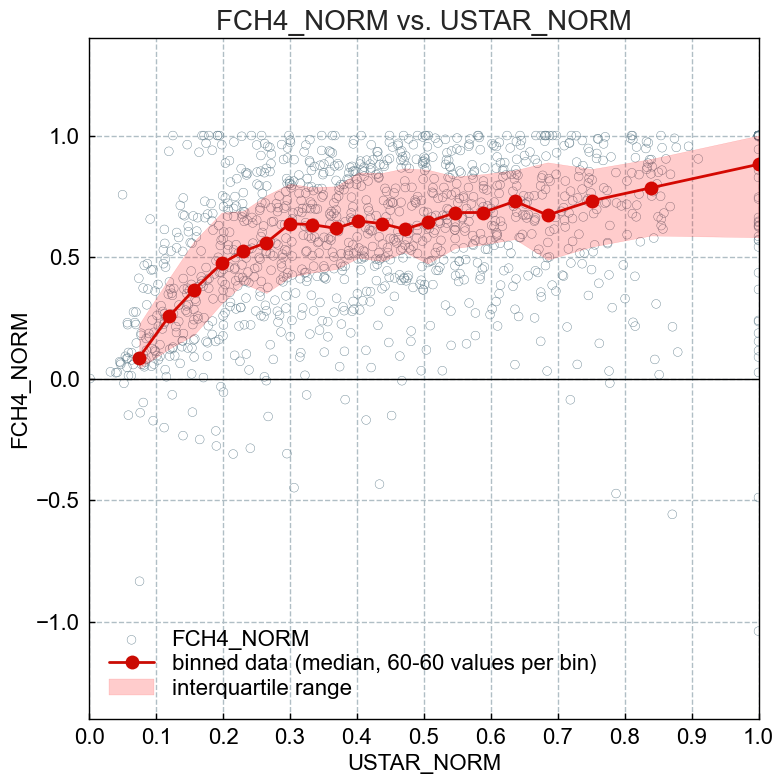

In [10]:
bdf = bdf.sort_values(by='USTAR_NORM', ascending=True)
sca = ScatterXY(x=bdf['USTAR_NORM'], y=bdf['FCH4_NORM'], xlim=[0, 1], ylim=[-1.4, 1.4], nbins=20)
sca.plot()